In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_excel('bls-T3.xlsx')

In [103]:
df.head()

,Characteristic,Total Civilian,TotalEmpLaidOff,PercentEmpLaidOff,ReceivedPay,NotReceivedPay,PercentReceivedPay,PercentNotReceivedPay,Month
0,"Total, 16 years and over",263202,6043,2.3,1435,4608,23.7,76.3,2022-01
1,16 to 24 years,37879,728,1.9,156,572,21.5,78.5,2022-01
2,16 to 19 years,17020,218,1.3,39,179,18.0,82.0,2022-01
3,20 to 24 years,20859,509,2.4,117,392,23.0,77.0,2022-01
4,25 to 54 years,127164,3708,2.9,959,2748,25.9,74.1,2022-01


In [104]:
df.replace(u'\xa0',u'', regex=True, inplace=True)

In [105]:
df['Characteristic'].unique()

array(['Total, 16 years and over', '16 to 24 years', '16 to 19 years',
       '20 to 24 years', '25 to 54 years', '25 to 34 years',
       '35 to 44 years', '45 to 54 years', '55 years and over',
       '55 to 64 years', '65 years and over', 'Men, 16 years and over',
       'Women, 16 years and over', 'White', 'Black or African American',
       'Asian', 'Hispanic or Latino ethnicity', 'Married, spouse present',
       'Widowed, divorced, or separated', 'Never married',
       'With own children under 18', 'With no own children under 18',
       'Total, 25 years and over', 'Less than a high school diploma',
       'High school graduates, no college',
       'Some college or associate degree', "Bachelor's degree and higher",
       "Bachelor's degree only", 'Advanced degree'], dtype=object)

In [106]:
age = ['16 to 19 years',
       '20 to 24 years', '25 to 54 years', '25 to 34 years',
       '35 to 44 years', '45 to 54 years', '55 years and over',
       '55 to 64 years', '65 years and over']

In [107]:
gender_with_age = ['Men, 16 years and over', 'Women, 16 years and over']

In [108]:
ethnicity = ['White', 'Black or African American','Asian', 'Hispanic or Latino ethnicity']

In [109]:
married = [ 'Married, spouse present','Widowed, divorced, or separated', 'Never married']

In [110]:
children = ['With own children under 18', 'With no own children under 18']

In [111]:
education = ['Less than a high school diploma','High school graduates, no college', 'Some college or associate degree', "Bachelor's degree and higher","Bachelor's degree only", 'Advanced degree']

In [112]:
df['Month'] = pd.to_datetime(df['Month'])

In [113]:
df_age = df[df['Characteristic'].isin(age)]
df_gender_with_age = df[df['Characteristic'].isin(gender_with_age)]
df_ethnicity = df[df['Characteristic'].isin(ethnicity)]
df_married = df[df['Characteristic'].isin(married)]
df_children = df[df['Characteristic'].isin(children)]
df_education = df[df['Characteristic'].isin(education)]

In [114]:
df_age

,Characteristic,Total Civilian,TotalEmpLaidOff,PercentEmpLaidOff,ReceivedPay,NotReceivedPay,PercentReceivedPay,PercentNotReceivedPay,Month
2,16 to 19 years,17020,218,1.3,39,179,18.0,82.0,2022-01-01
3,20 to 24 years,20859,509,2.4,117,392,23.0,77.0,2022-01-01
4,25 to 54 years,127164,3708,2.9,959,2748,25.9,74.1,2022-01-01
5,25 to 34 years,44255,1174,2.7,253,920,21.6,78.4,2022-01-01
6,35 to 44 years,42845,1293,3.0,323,970,25.0,75.0,2022-01-01
...,...,...,...,...,...,...,...,...,...
430,65 years and over,55398,1448,2.6,164,1284,11.3,88.7,2021-01-01
433,25 to 54 years,62258,4392,7.1,616,3776,14.0,86.0,2021-01-01
434,55 years and over,45189,2011,4.4,269,1742,13.4,86.6,2021-01-01
437,25 to 54 years,63802,4342,6.8,516,3826,11.9,88.1,2021-01-01


In [115]:
#df_age[['Year','Month']] = df.Month.str.split("-", expand = True)


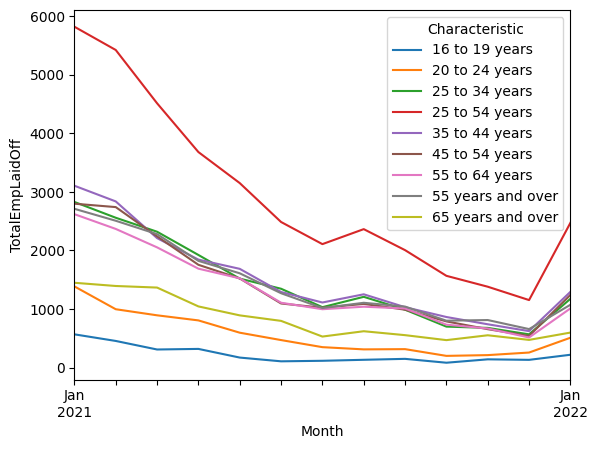

In [124]:
table = pd.pivot_table(df_age, values = 'TotalEmpLaidOff', index = ['Month'], columns = ['Characteristic'])

ax = table.plot(xticks=table.index, ylabel='TotalEmpLaidOff')
plt.show()

We see a declining trend for employee layoffs until December 2021 and an increase after that

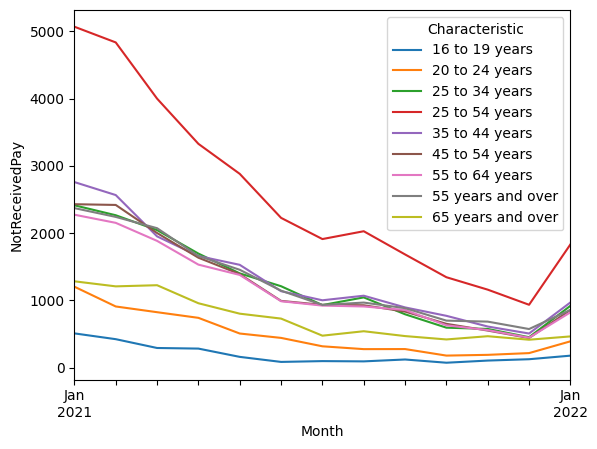

In [125]:
table = pd.pivot_table(df_age, values = 'NotReceivedPay', index = ['Month'], columns = ['Characteristic'])

ax = table.plot(xticks=table.index, ylabel='NotReceivedPay')
plt.show()

For 16-19 years aged employees the layoffs trend didn't change much

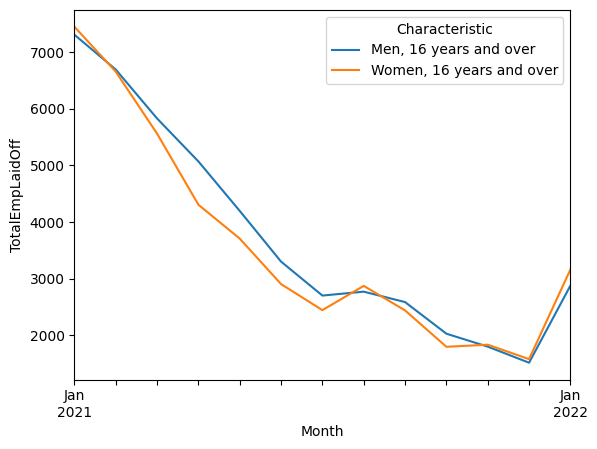

In [126]:
table = pd.pivot_table(df_gender_with_age, values = 'TotalEmpLaidOff', index = ['Month'], columns = ['Characteristic'])

ax = table.plot(xticks=table.index, ylabel='TotalEmpLaidOff')
plt.show()

A rapid decline in the layoffs but not much difference between men and women indicating gender is not a differentiating factor 

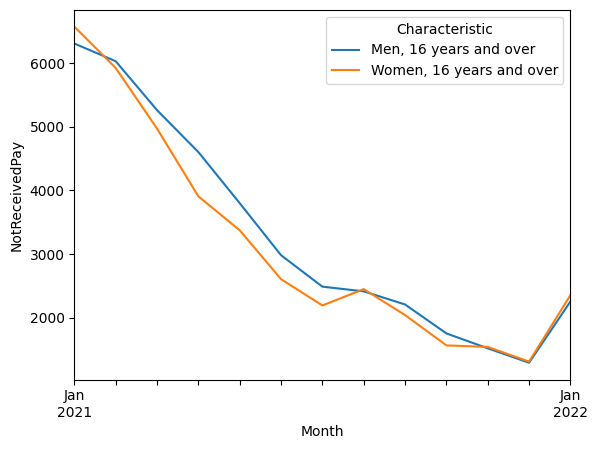

In [156]:
table = pd.pivot_table(df_gender_with_age, values = 'NotReceivedPay', index = ['Month'], columns = ['Characteristic'])

ax = table.plot(xticks=table.index, ylabel='NotReceivedPay')
plt.show()

A rapid decline in the layoffs but not much difference between men and women indicating gender is not a differentiating factor 

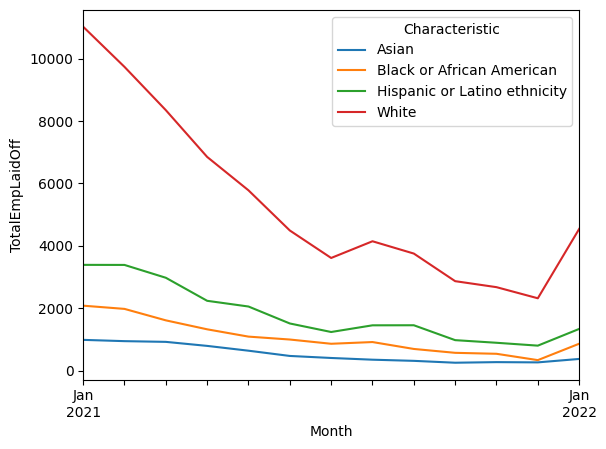

In [128]:
table = pd.pivot_table(df_ethnicity, values = 'TotalEmpLaidOff', index = ['Month'], columns = ['Characteristic'])

ax = table.plot(xticks=table.index, ylabel='TotalEmpLaidOff')
plt.show()

Asian people layoffs trend is same almost throught the time period

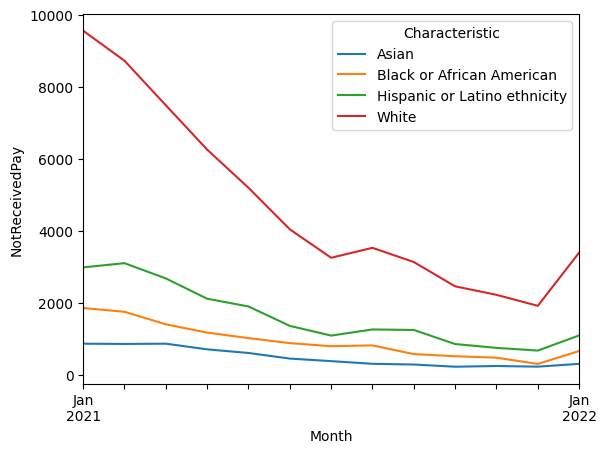

In [155]:
table = pd.pivot_table(df_ethnicity, values = 'NotReceivedPay', index = ['Month'], columns = ['Characteristic'])

ax = table.plot(xticks=table.index, ylabel='NotReceivedPay')
plt.show()

Asian people layoffs trend is same almost throught the time period

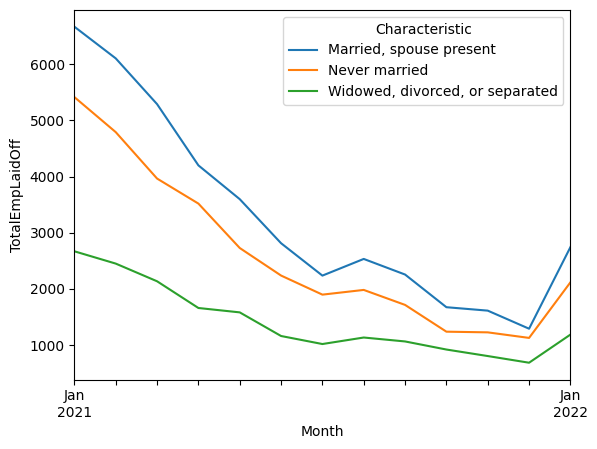

In [130]:
table = pd.pivot_table(df_married, values = 'TotalEmpLaidOff', index = ['Month'], columns = ['Characteristic'])

ax = table.plot(xticks=table.index, ylabel='TotalEmpLaidOff')
plt.show()

A declining trend irrespective of married status

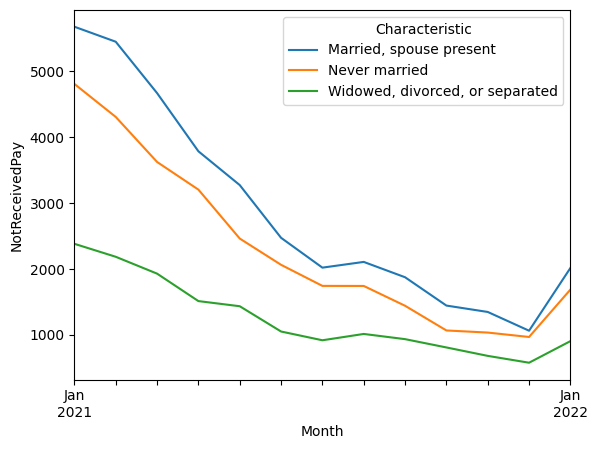

In [154]:
table = pd.pivot_table(df_married, values = 'NotReceivedPay', index = ['Month'], columns = ['Characteristic'])

ax = table.plot(xticks=table.index, ylabel='NotReceivedPay')
plt.show()

A declining trend irrespective of married status

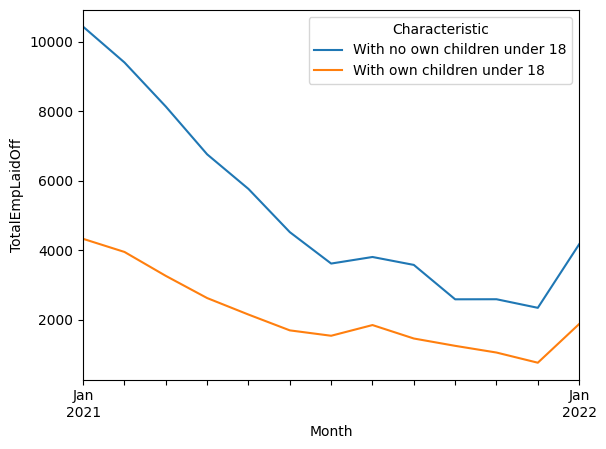

In [132]:
table = pd.pivot_table(df_children, values = 'TotalEmpLaidOff', index = ['Month'], columns = ['Characteristic'])

ax = table.plot(xticks=table.index, ylabel='TotalEmpLaidOff')
plt.show()

It can be observed that the employees that are laid off with no own own children under 18 have a downward trend while is same for employees with own children under 18 as well. At dec 2021 there is slight increment in the lay off.

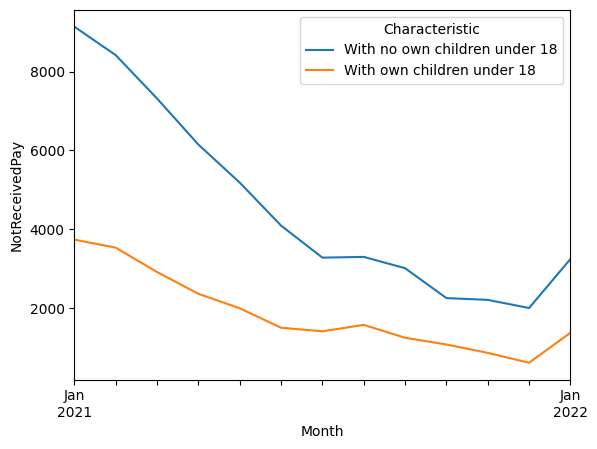

In [153]:
table = pd.pivot_table(df_children, values = 'NotReceivedPay', index = ['Month'], columns = ['Characteristic'])

ax = table.plot(xticks=table.index, ylabel='NotReceivedPay')
plt.show()

It can be observed that the employees that are did not receive pay with no own own children under 18 have a downward trend while is same for employees with own children under 18 as well. At dec 2021 there is slight increment in the lay off.


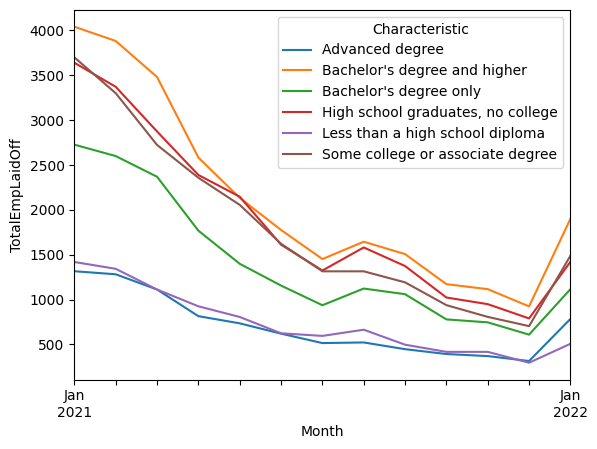

In [134]:
table = pd.pivot_table(df_education, values = 'TotalEmpLaidOff', index = ['Month'], columns = ['Characteristic'])

ax = table.plot(xticks=table.index, ylabel='TotalEmpLaidOff')
plt.show()

It can be derived that irrespective of what the level of education is it does not effect the trends of getting laid off from the job., It mostly is dependent on the skills.

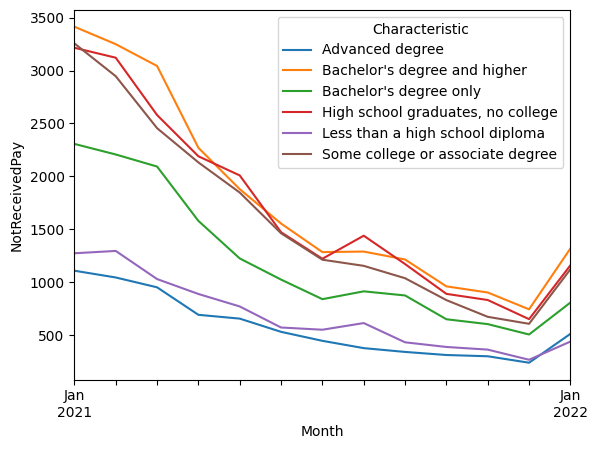

In [152]:
table = pd.pivot_table(df_education, values = 'NotReceivedPay', index = ['Month'], columns = ['Characteristic'])

ax = table.plot(xticks=table.index, ylabel='NotReceivedPay')
plt.show()

It can be derived that irrespective of what the level of education is it does not effect the trends of getting laid off from the job., It mostly is dependent on the skills.

In [136]:
df_age.plot

,Characteristic,Total Civilian,TotalEmpLaidOff,PercentEmpLaidOff,ReceivedPay,NotReceivedPay,PercentReceivedPay,PercentNotReceivedPay,Month
2,16 to 19 years,17020,218,1.3,39,179,18.0,82.0,2022-01-01
3,20 to 24 years,20859,509,2.4,117,392,23.0,77.0,2022-01-01
4,25 to 54 years,127164,3708,2.9,959,2748,25.9,74.1,2022-01-01
5,25 to 34 years,44255,1174,2.7,253,920,21.6,78.4,2022-01-01
6,35 to 44 years,42845,1293,3.0,323,970,25.0,75.0,2022-01-01
...,...,...,...,...,...,...,...,...,...
430,65 years and over,55398,1448,2.6,164,1284,11.3,88.7,2021-01-01
433,25 to 54 years,62258,4392,7.1,616,3776,14.0,86.0,2021-01-01
434,55 years and over,45189,2011,4.4,269,1742,13.4,86.6,2021-01-01
437,25 to 54 years,63802,4342,6.8,516,3826,11.9,88.1,2021-01-01


/var/folders/93/1p2ftnx57pz89h_yrtccmxj40000gn/T/ipykernel_30546/4288426471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_age.groupby(['Characteristic']).sum()[['TotalEmpLaidOff','NotReceivedPay']].plot.bar()


<AxesSubplot: xlabel='Characteristic'>

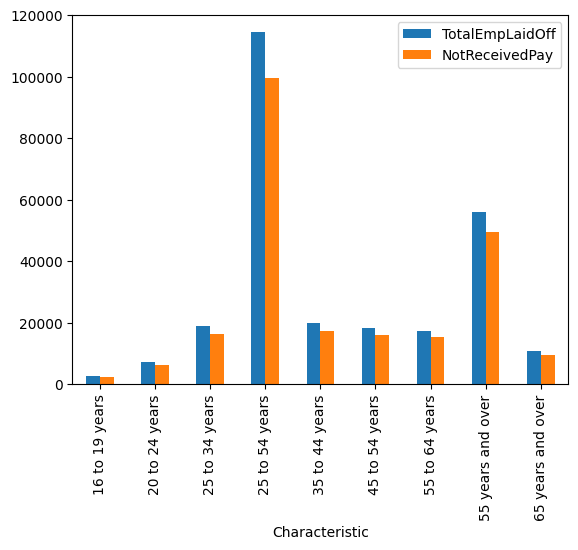

In [140]:
df_age.groupby(['Characteristic']).sum()[['TotalEmpLaidOff','NotReceivedPay']].plot.bar()

In age category, people between ages of 25-54 years and 55 years and over were laid off the most

/var/folders/93/1p2ftnx57pz89h_yrtccmxj40000gn/T/ipykernel_30546/2840261409.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gender_with_age.groupby(['Characteristic']).sum()[['TotalEmpLaidOff','NotReceivedPay']].plot.bar()


<AxesSubplot: xlabel='Characteristic'>

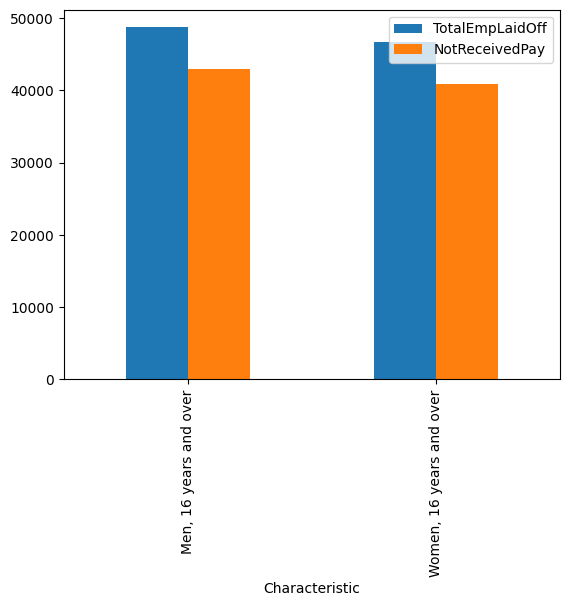

In [141]:
df_gender_with_age.groupby(['Characteristic']).sum()[['TotalEmpLaidOff','NotReceivedPay']].plot.bar()

We see that gender is not really an indicative factor for layoffs

/var/folders/93/1p2ftnx57pz89h_yrtccmxj40000gn/T/ipykernel_30546/4104100361.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ethnicity.groupby(['Characteristic']).sum()[['TotalEmpLaidOff','NotReceivedPay']].plot.bar()


<AxesSubplot: xlabel='Characteristic'>

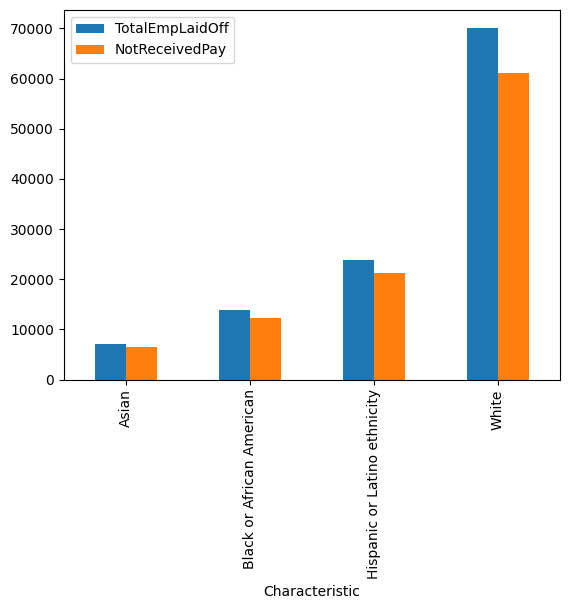

In [151]:
df_ethnicity.groupby(['Characteristic']).sum()[['TotalEmpLaidOff','NotReceivedPay']].plot.bar()

In ethnic groups, people of ethnicity white were laid off the highest. This can be an anomaly because the population is majorly white.  

/var/folders/93/1p2ftnx57pz89h_yrtccmxj40000gn/T/ipykernel_30546/2013000013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_married.groupby(['Characteristic']).sum()[['TotalEmpLaidOff','NotReceivedPay']].plot.bar()


<AxesSubplot: xlabel='Characteristic'>

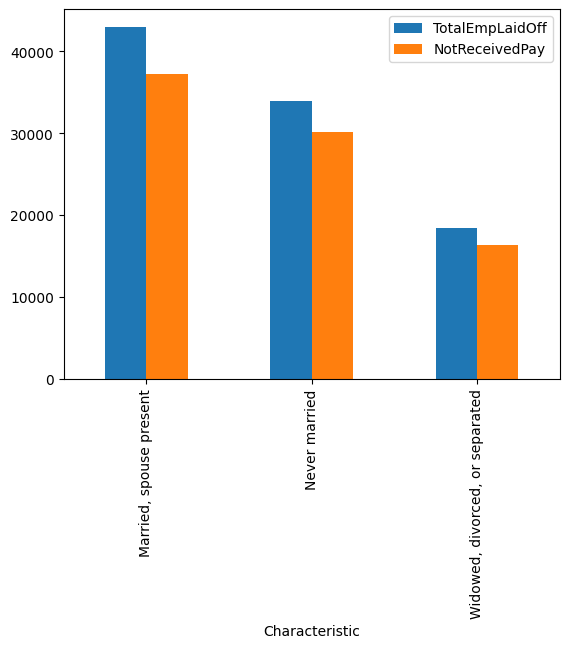

In [143]:
df_married.groupby(['Characteristic']).sum()[['TotalEmpLaidOff','NotReceivedPay']].plot.bar()

Married people were laid off the highest

/var/folders/93/1p2ftnx57pz89h_yrtccmxj40000gn/T/ipykernel_30546/2189374360.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_children.groupby(['Characteristic']).sum()[['TotalEmpLaidOff','NotReceivedPay']].plot.bar()


<AxesSubplot: xlabel='Characteristic'>

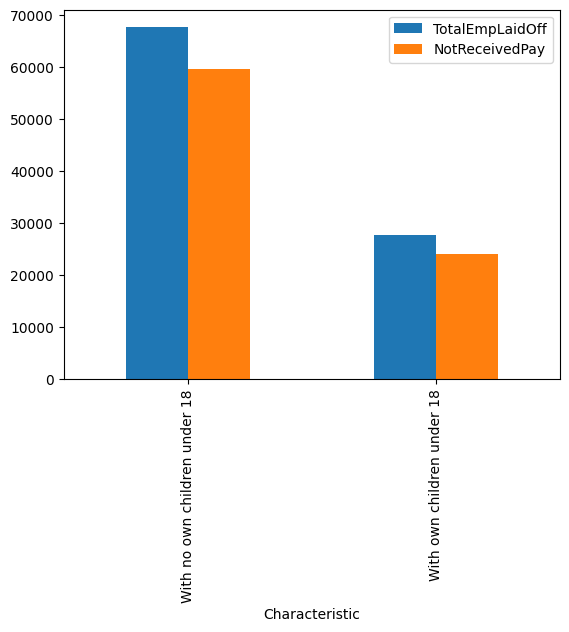

In [144]:
df_children.groupby(['Characteristic']).sum()[['TotalEmpLaidOff','NotReceivedPay']].plot.bar()

People without children and adopted children under 18 are the ones who were laid off the most

/var/folders/93/1p2ftnx57pz89h_yrtccmxj40000gn/T/ipykernel_30546/3225505399.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_education.groupby(['Characteristic']).sum()[['TotalEmpLaidOff','NotReceivedPay']].plot.bar()


<AxesSubplot: xlabel='Characteristic'>

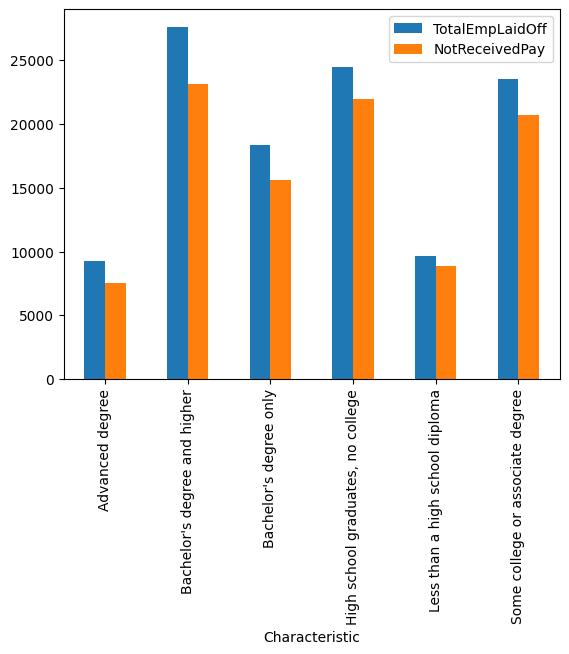

In [145]:
df_education.groupby(['Characteristic']).sum()[['TotalEmpLaidOff','NotReceivedPay']].plot.bar()

The distribution of data is not indicative of any real inference 

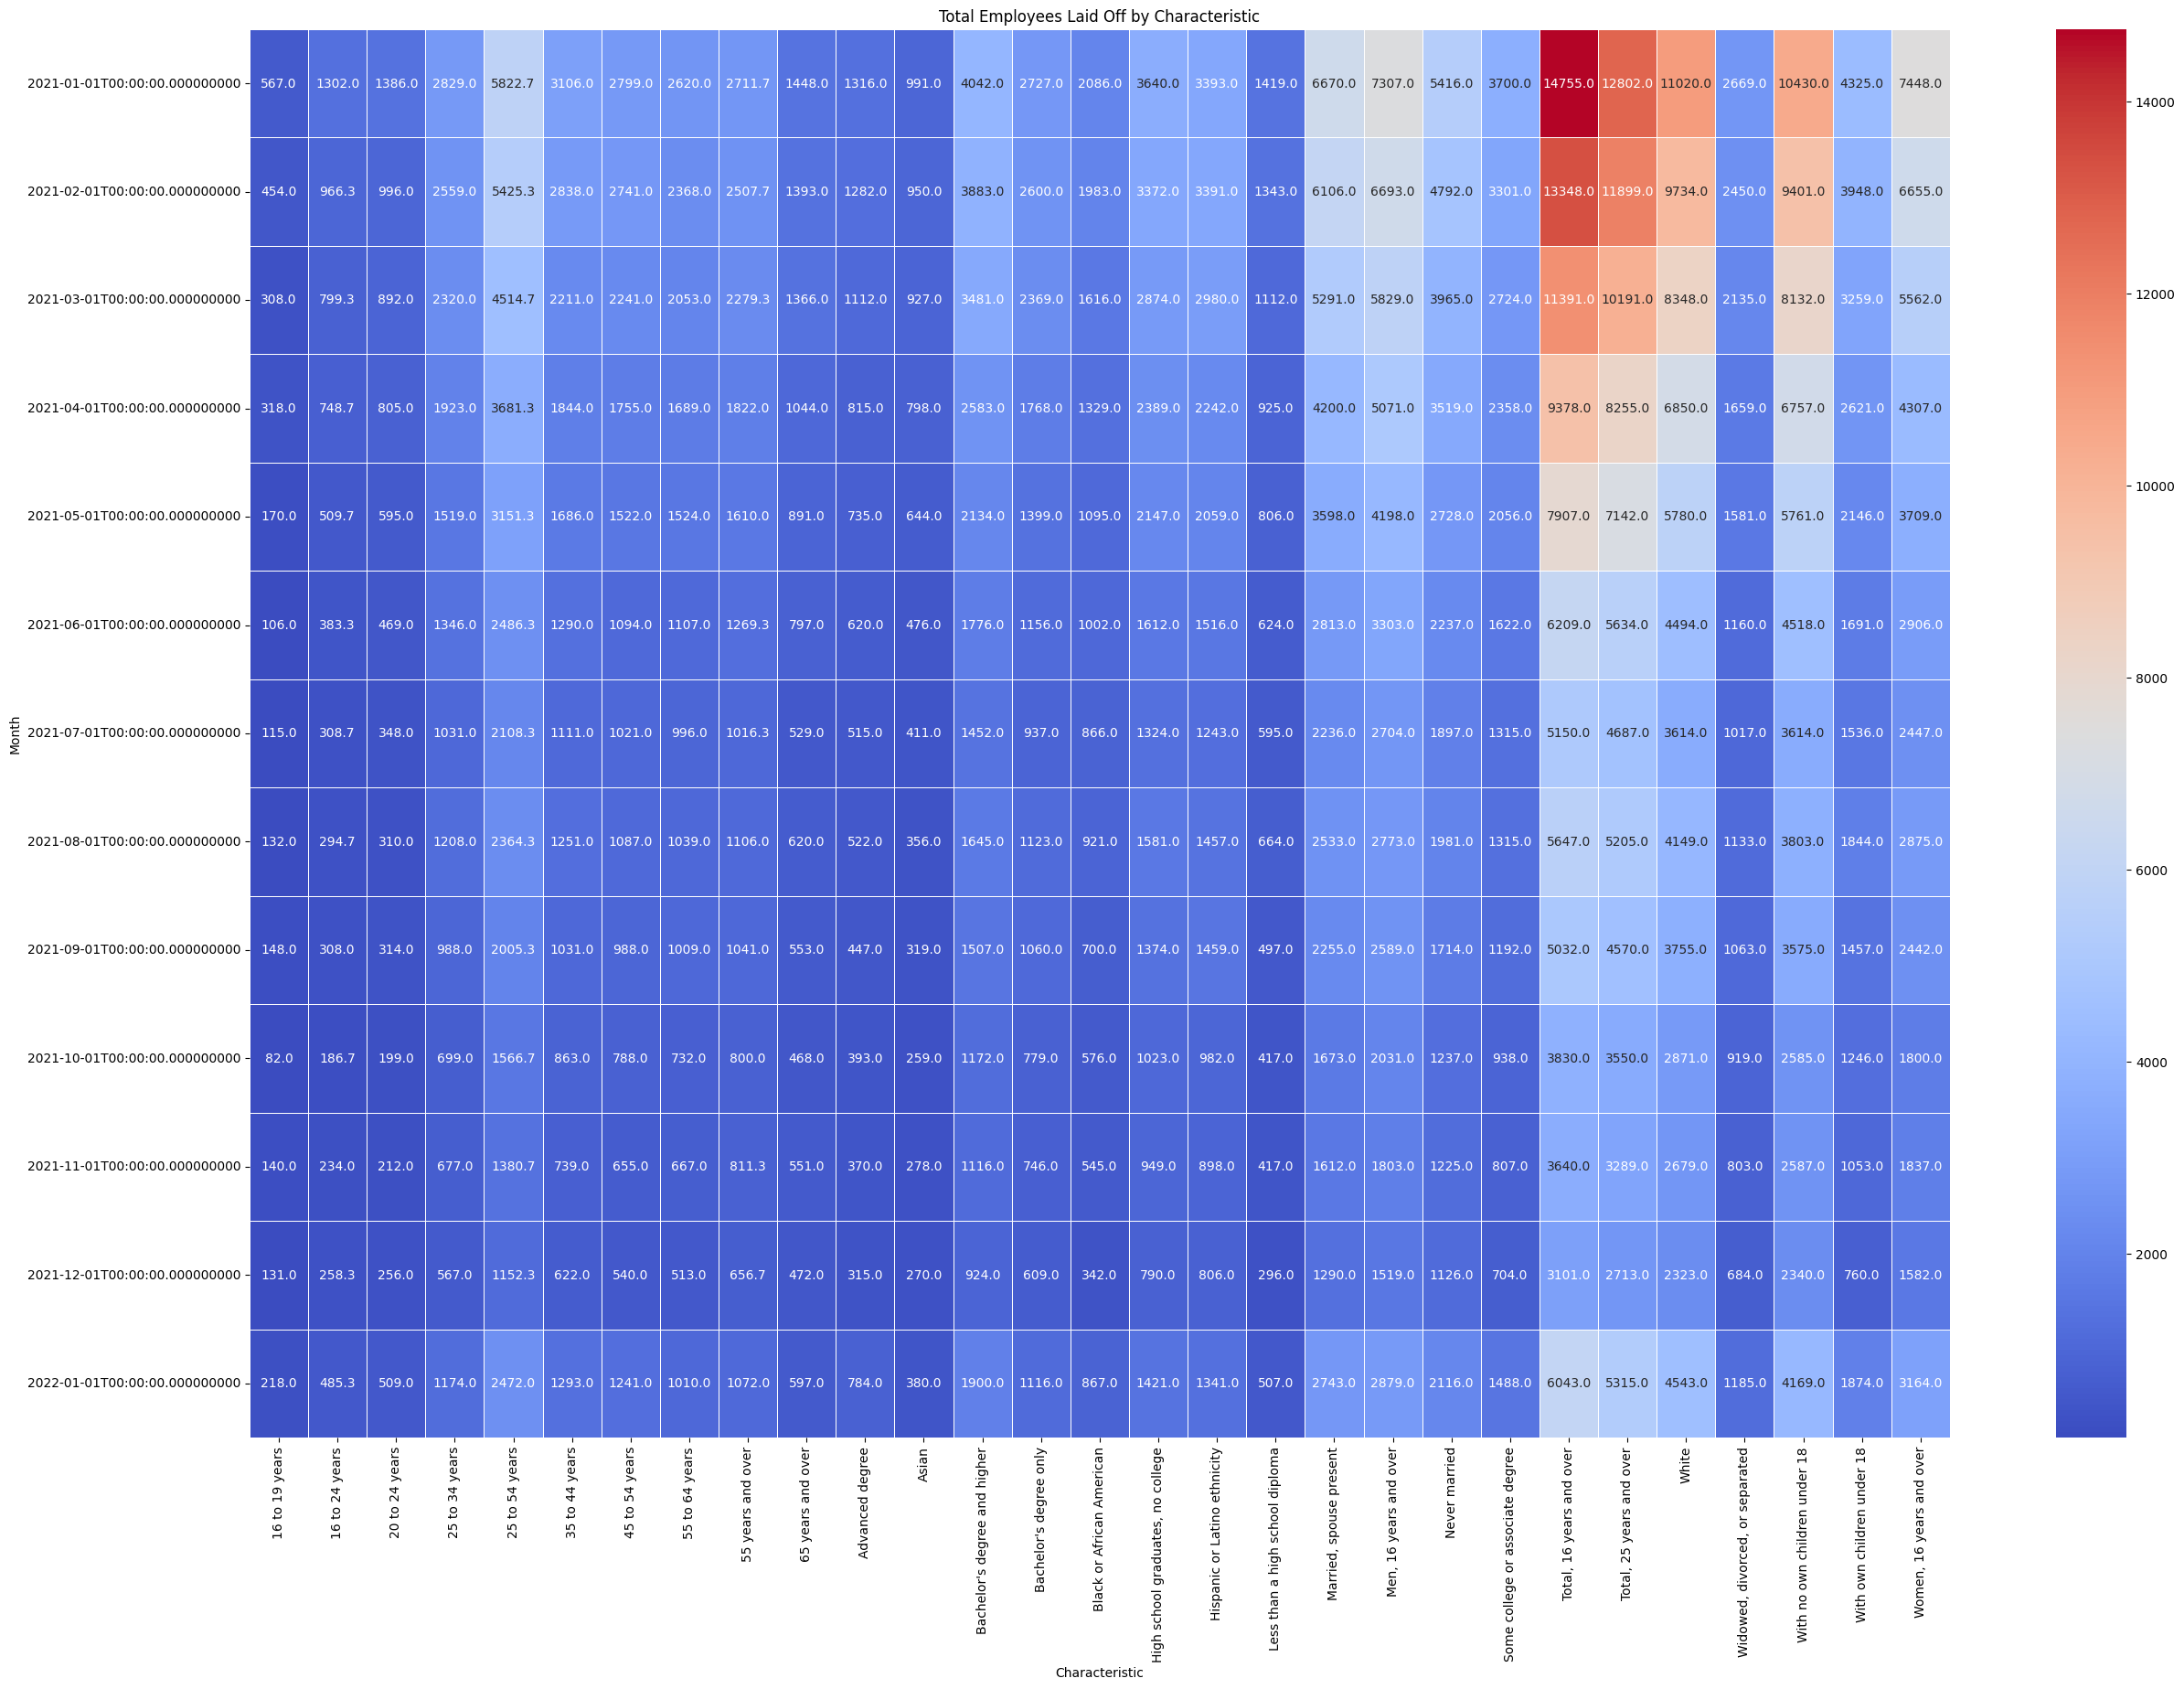

In [149]:
# Pivot table
table = pd.pivot_table(df, values='TotalEmpLaidOff', index=['Month'], columns=['Characteristic'])

# Create heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(table, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.4)
plt.title('Total Employees Laid Off by Characteristic')
plt.show()

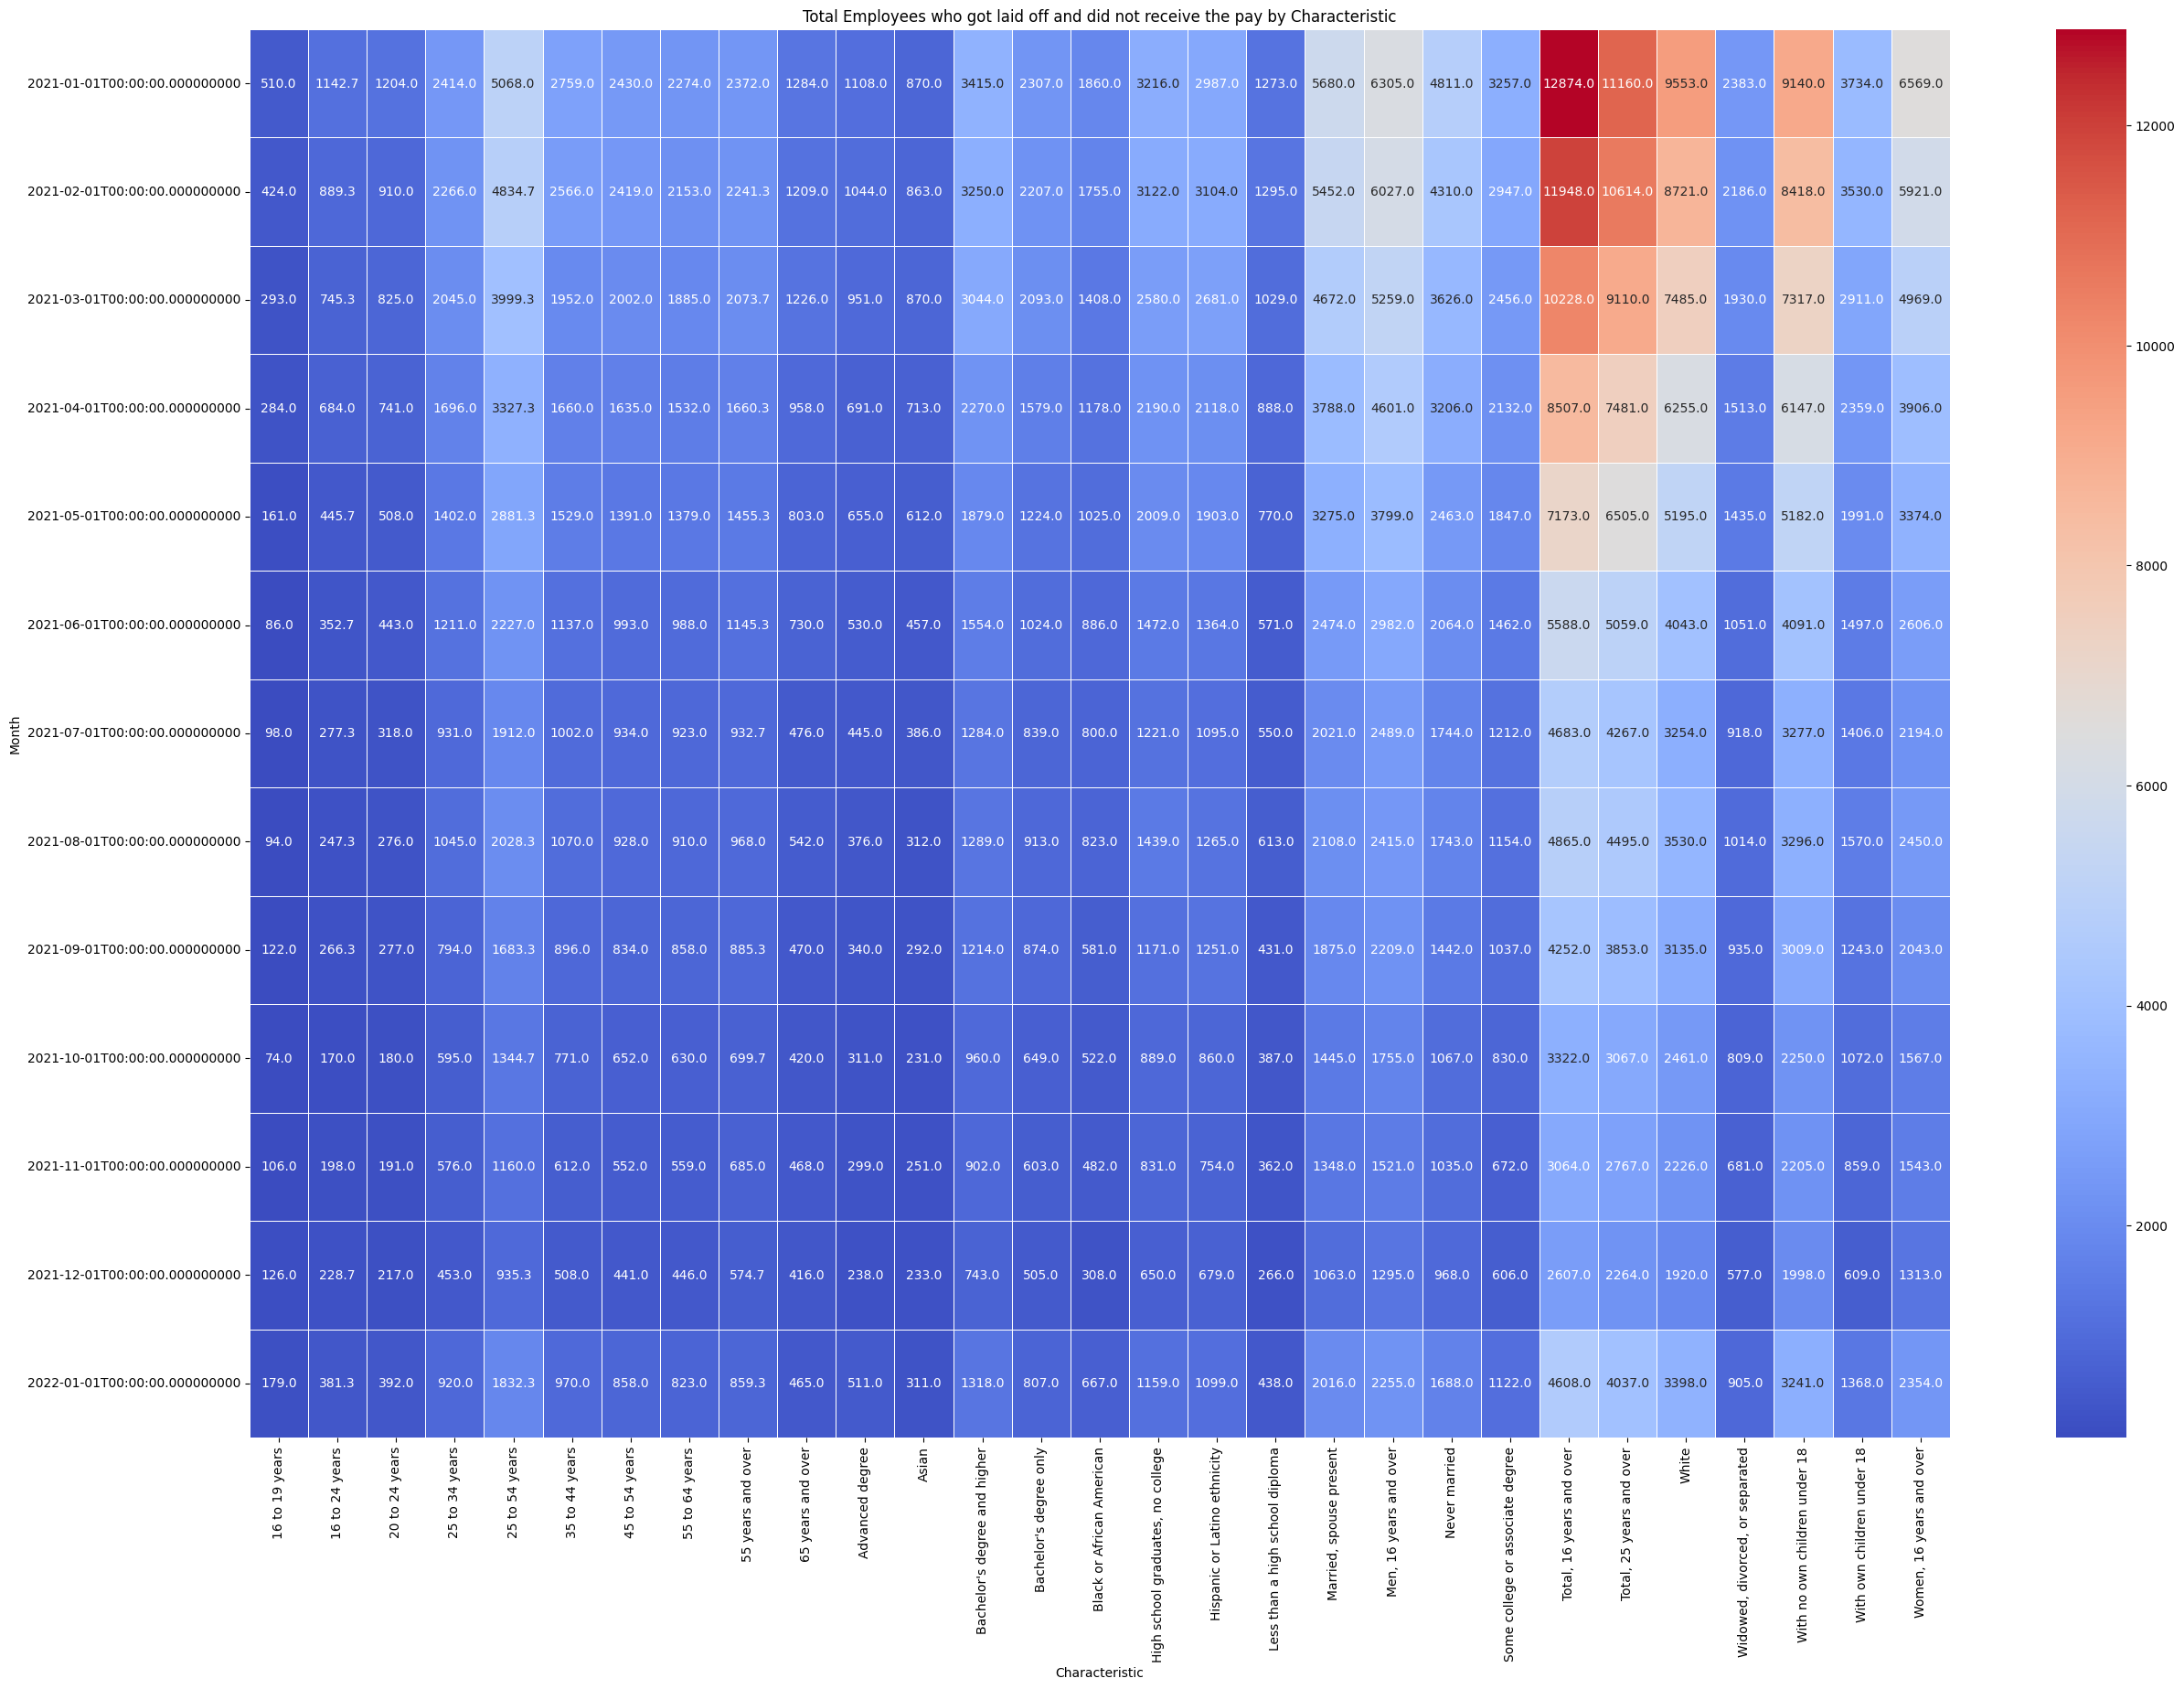

In [157]:
# Pivot table
table = pd.pivot_table(df, values='NotReceivedPay', index=['Month'], columns=['Characteristic'])

# Create heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(table, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.4)
plt.title('Total Employees who got laid off and did not receive the pay by Characteristic')
plt.show()